# Forecasting the outcome, goals at home and away of Premier league matches

## Data Gathering and Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Datasets/matches.csv'
df = pd.read_csv(file_path)
df.tail()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City
4787,91,2020-07-26,16:00 (17:00),Premier League,Matchweek 38,Sun,Away,L,0,5,...,Match Report,NaN,5,4,19.8,0,0,0,2020,Norwich City


In [3]:
df.shape

(4788, 28)

In [4]:
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [5]:
# Dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'date', 'time', 'comp', 'round', 'match report', 'notes', 'season']
df = df.drop(columns=columns_to_drop)

In [6]:
df.tail()

,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team
4783,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,12,3,16.9,1,0,0,Norwich City
4784,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,11,2,19.8,1,0,0,Norwich City
4785,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,2,0,20.6,0,0,0,Norwich City
4786,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,6,2,13.4,0,0,0,Norwich City
4787,Sun,Away,L,0,5,Manchester City,1.0,3.2,27,NaN,Christoph Zimmermann,4-2-3-1,Craig Pawson,5,4,19.8,0,0,0,Norwich City


In [7]:
# Handling missing values
df = df.drop(columns=['attendance'])  # Dropping the 'attendance' column due to many missing values
df['dist'].fillna(df['dist'].median(), inplace=True)  # Filling missing 'dist' values with median

In [8]:
df.tail()

,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team
4783,Tue,Away,L,1,2,Watford,1.2,1.2,56,Alexander Tettey,4-2-3-1,Anthony Taylor,12,3,16.9,1,0,0,Norwich City
4784,Sat,Home,L,0,4,West Ham,0.6,3.5,53,Alexander Tettey,4-2-3-1,Kevin Friend,11,2,19.8,1,0,0,Norwich City
4785,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,Alexander Tettey,4-1-4-1,Jonathan Moss,2,0,20.6,0,0,0,Norwich City
4786,Sat,Home,L,0,2,Burnley,0.3,1.8,42,Alexander Tettey,4-2-3-1,Kevin Friend,6,2,13.4,0,0,0,Norwich City
4787,Sun,Away,L,0,5,Manchester City,1.0,3.2,27,Christoph Zimmermann,4-2-3-1,Craig Pawson,5,4,19.8,0,0,0,Norwich City


In [9]:
list(df.columns)

['day',
 'venue',
 'result',
 'gf',
 'ga',
 'opponent',
 'xg',
 'xga',
 'poss',
 'captain',
 'formation',
 'referee',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'team']

In [10]:
# Dropping more columns whose values cannot be known before the match
columns_to_drop = ['xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
df = df.drop(columns=columns_to_drop)

In [11]:
df.head()

,day,venue,result,gf,ga,opponent,captain,formation,referee,team
0,Mon,Away,W,3,1,Wolves,Fernandinho,4-2-3-1,Andre Marriner,Manchester City
1,Sun,Home,L,2,5,Leicester City,Fernandinho,4-2-3-1,Michael Oliver,Manchester City
2,Sat,Away,D,1,1,Leeds United,Kevin De Bruyne,4-3-3,Mike Dean,Manchester City
3,Sat,Home,W,1,0,Arsenal,Raheem Sterling,3-1-4-2,Chris Kavanagh,Manchester City
4,Sat,Away,D,1,1,West Ham,Raheem Sterling,4-3-3,Anthony Taylor,Manchester City


## Exploratory Data Analysis

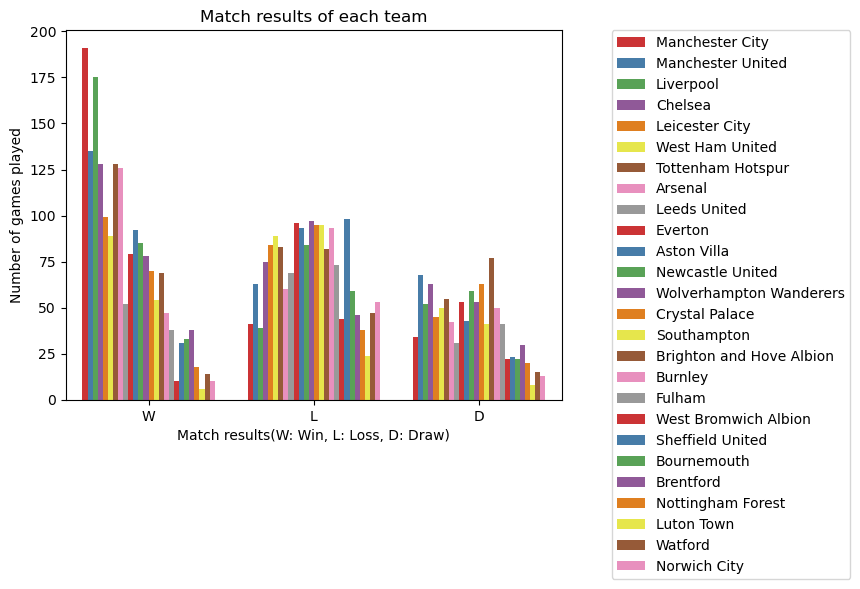

In [12]:
sns.countplot(x= 'result', data= df, palette = 'Set1', hue="team")
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
# Adding labels and title
plt.xlabel('Match results(W: Win, L: Loss, D: Draw)')
plt.ylabel('Number of games played')
plt.title('Match results of each team')
plt.show()

#### Manchester city and Liverpool win most of their matches

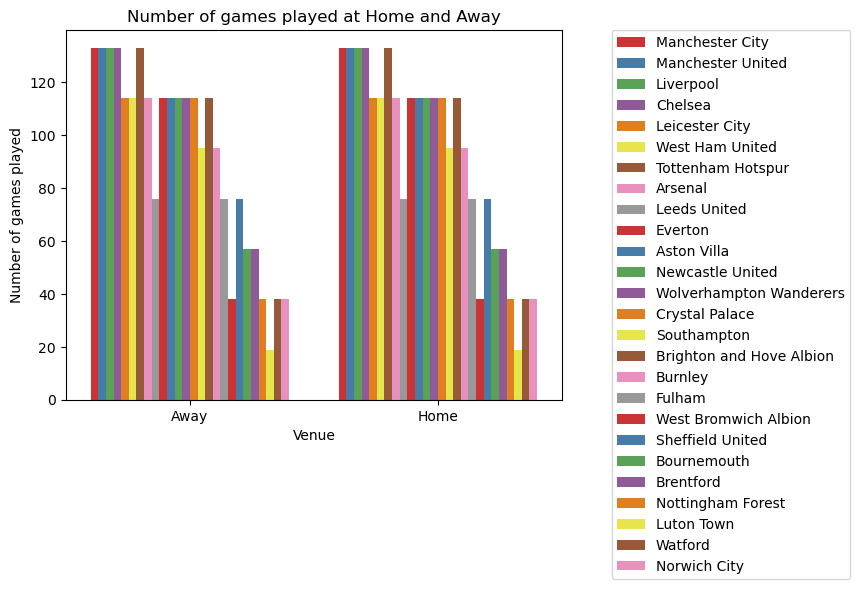

In [13]:
sns.countplot(x= 'venue', data= df, palette = 'Set1', hue="team")
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
# Adding labels and title
plt.xlabel('Venue')
plt.ylabel('Number of games played')
plt.title('Number of games played at Home and Away')
plt.show()

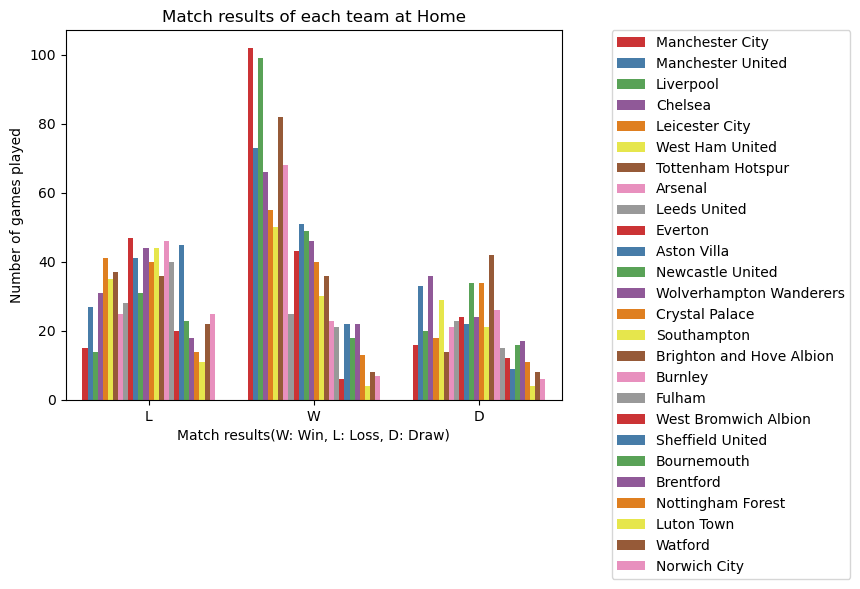

In [14]:
sns.countplot(x= 'result', data= df[df['venue'] == 'Home'], palette = 'Set1', hue="team")
#g.figure.get_axes()[0].legend(title='Team',loc='lower left')
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
# Adding labels and title
plt.xlabel('Match results(W: Win, L: Loss, D: Draw)')
plt.ylabel('Number of games played')
plt.title('Match results of each team at Home')
plt.show()

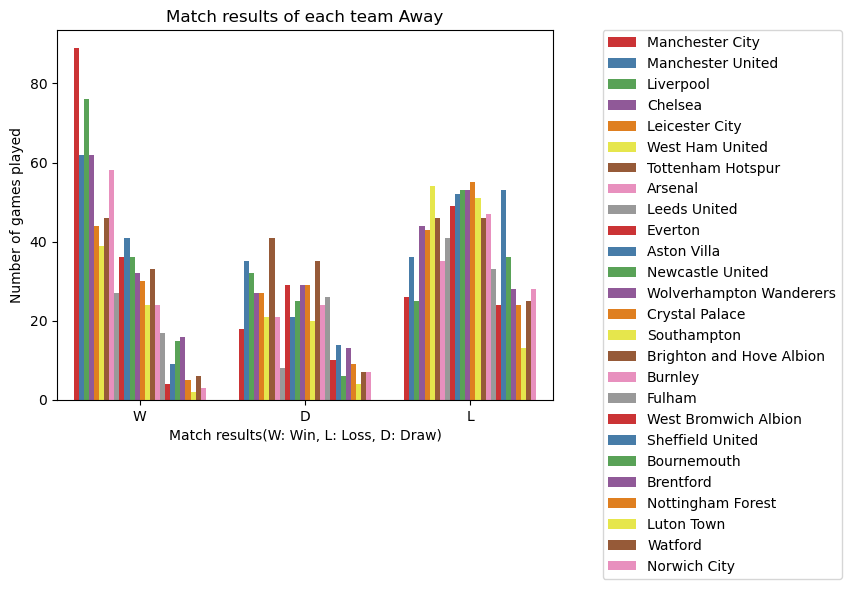

In [15]:
sns.countplot(x= 'result', data= df[df['venue'] == 'Away'], palette = 'Set1', hue="team")
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
# Adding labels and title
plt.xlabel('Match results(W: Win, L: Loss, D: Draw)')
plt.ylabel('Number of games played')
plt.title('Match results of each team Away')
plt.show()

In [16]:
team_gf_sum = df.groupby('team')['gf'].sum()
team_ga_sum = df.groupby('team')['ga'].sum()
# Combine the sum of gf and ga into a DataFrame
g_df = pd.DataFrame({
    'gf_sum': team_gf_sum,
    'ga_sum': team_ga_sum
})
g_df.head()

,gf_sum,ga_sum
team,,
Arsenal,406,246
Aston Villa,330,320
Bournemouth,131,203
Brentford,162,167
Brighton and Hove Albion,288,305


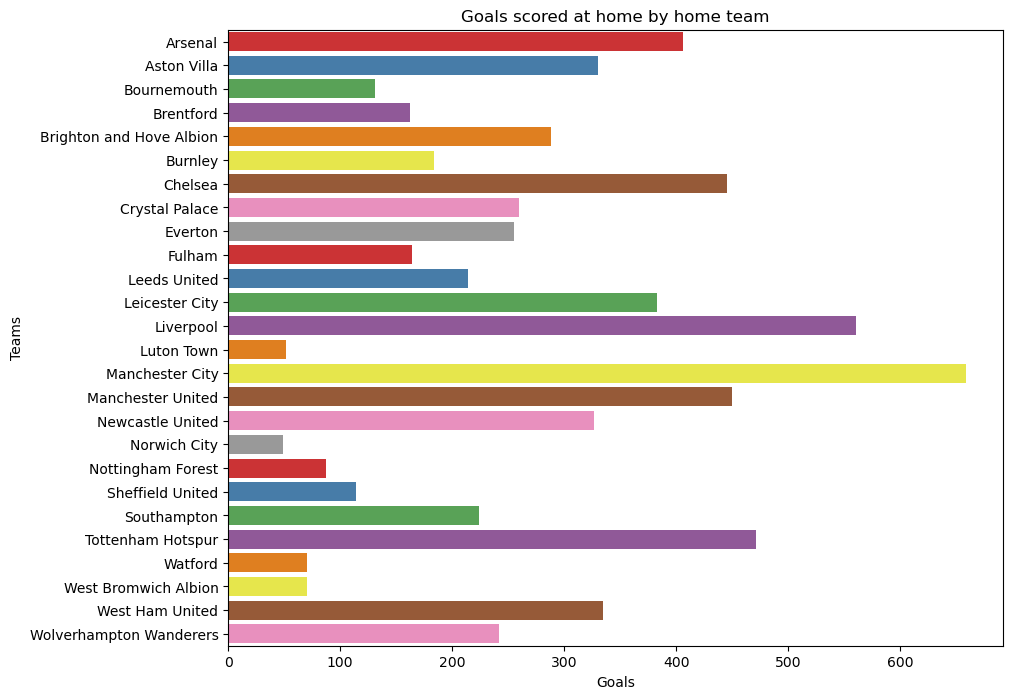

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(g_df, x="gf_sum", y=g_df.index, palette = 'Set1', orient = 'h')
# Adding labels and title
plt.xlabel('Goals')
plt.ylabel('Teams')
plt.title('Goals scored at home by home team')
plt.show()

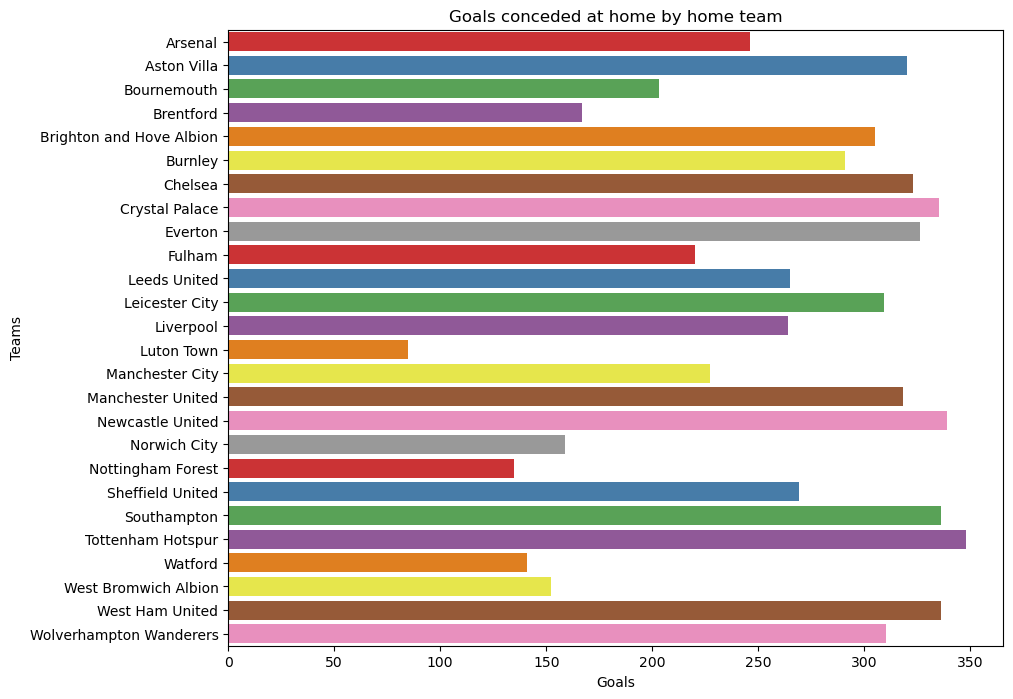

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(g_df, x="ga_sum", y=g_df.index, palette = 'Set1', orient = 'h')
# Adding labels and title
plt.xlabel('Goals')
plt.ylabel('Teams')
plt.title('Goals conceded at home by home team')
plt.show()

In [19]:
team_gfo_sum = df.groupby('opponent')['gf'].sum()
team_gao_sum = df.groupby('opponent')['ga'].sum()
# Combine the sum of gf and ga into a DataFrame
go_df = pd.DataFrame({
    'gfo_sum': team_gfo_sum,
    'gao_sum': team_gao_sum
})
go_df.head()

,gfo_sum,gao_sum
opponent,,
Arsenal,268,419
Aston Villa,356,340
Bournemouth,227,147
Brentford,167,162
Brighton,332,296


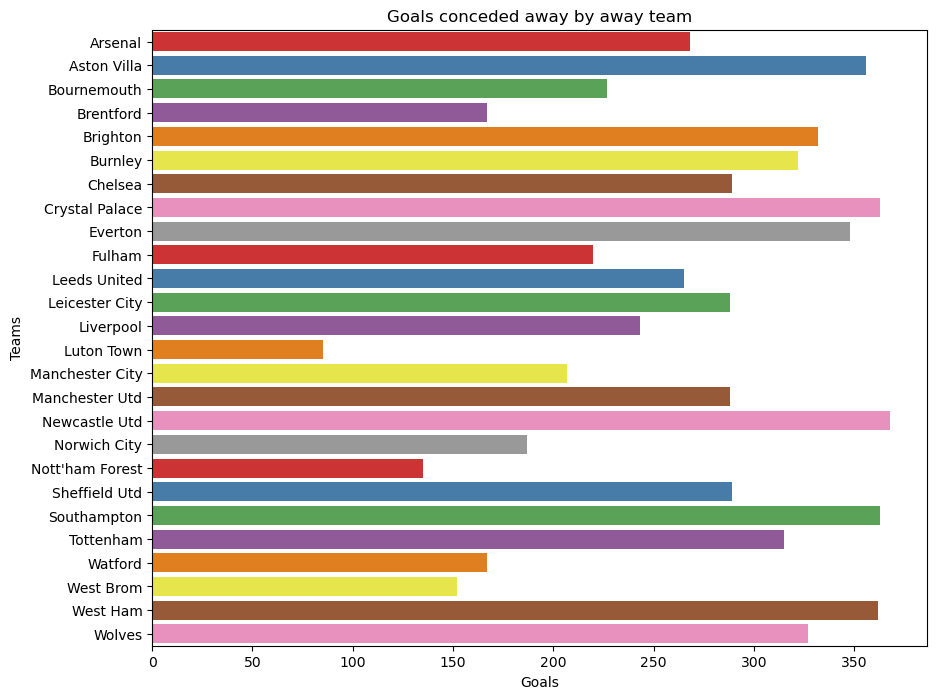

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(go_df, x="gfo_sum", y=go_df.index, palette = 'Set1', orient = 'h')
# Adding labels and title
plt.xlabel('Goals')
plt.ylabel('Teams')
plt.title('Goals conceded away by away team')
plt.show()

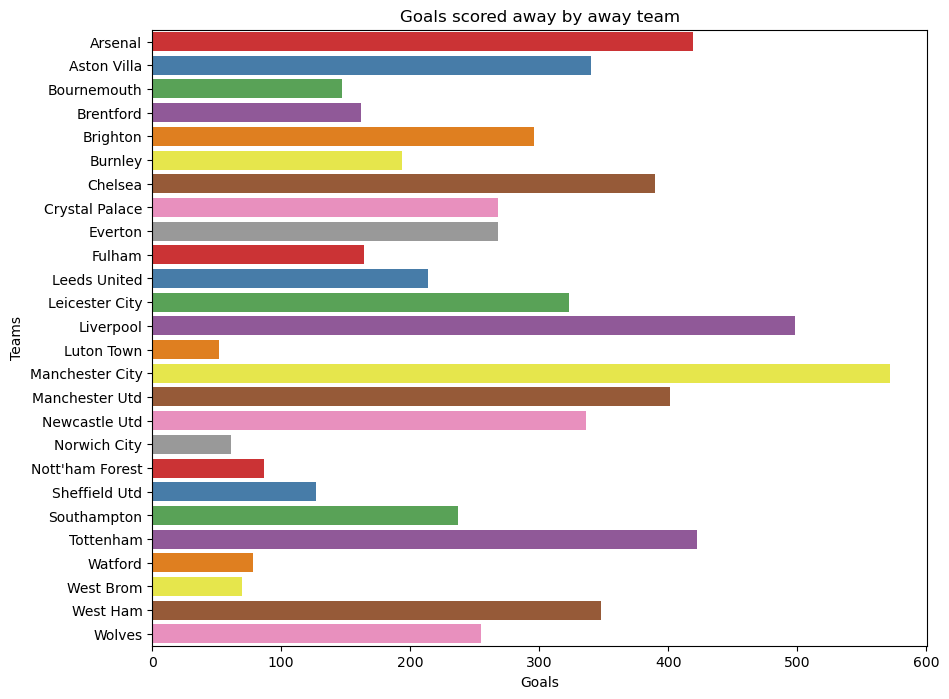

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(go_df, x="gao_sum", y=go_df.index, palette = 'Set1', orient = 'h')
# Adding labels and title
plt.xlabel('Goals')
plt.ylabel('Teams')
plt.title('Goals scored away by away team')
plt.show()

In [23]:
# Converting categorical variables to numerical values
df['venue'] = df['venue'].map({'Home': 1, 'Away': 0})
df['result'] = df['result'].map({'W': 2, 'D': 1, 'L': 0})

In [24]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['day', 'formation', 'referee', 'captain', 'opponent', 'team'], drop_first=True)

In [25]:
df.corr()

,venue,result,gf,ga,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,...,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
venue,1.000000e+00,0.105055,0.085134,-0.087483,0.004212,0.001266,-0.003246,3.407140e-17,-0.001780,0.002934,...,3.181427e-17,6.307826e-17,-8.515565e-17,2.116103e-17,1.022561e-16,-2.795813e-17,5.605733e-17,3.972539e-17,1.919745e-17,2.070820e-17
result,1.050548e-01,1.000000,0.649622,-0.648225,-0.000894,0.001346,-0.003804,2.261190e-03,0.002642,0.002771,...,-2.863459e-03,-8.384663e-02,-4.020663e-02,-9.384542e-02,-5.342231e-02,4.227417e-02,-6.487271e-02,-6.677010e-02,-3.977026e-03,-2.513481e-02
gf,8.513361e-02,0.649622,1.000000,-0.155266,-0.014197,-0.016277,0.041320,-1.494768e-02,-0.006401,-0.002150,...,-2.348422e-03,-7.772499e-02,-2.934391e-02,-9.629501e-02,-4.166994e-02,5.962814e-02,-5.098808e-02,-5.098808e-02,3.629380e-03,-6.586257e-02
ga,-8.748347e-02,-0.648225,-0.155266,1.000000,-0.012896,-0.016748,0.048534,-1.652115e-02,-0.008652,-0.008948,...,1.415425e-02,6.777558e-02,3.660870e-02,5.126941e-02,5.734946e-02,-1.830483e-02,4.440042e-02,5.868524e-02,1.186779e-02,-7.948156e-03
day_Mon,4.212261e-03,-0.000894,-0.014197,-0.012896,1.000000,-0.230113,-0.166720,-5.511656e-02,-0.066137,-0.082931,...,-1.186782e-02,-3.370233e-02,-6.740467e-03,-4.805138e-03,2.157785e-03,-2.758383e-02,-3.370233e-02,3.370233e-02,1.582376e-02,3.560345e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
team_Tottenham Hotspur,-2.795813e-17,0.042274,0.059628,-0.018305,-0.027584,-0.055571,0.086476,3.663524e-02,-0.041016,0.001068,...,-5.423261e-02,-3.080206e-02,-3.080206e-02,-4.391629e-02,-4.930238e-02,1.000000e+00,-3.080206e-02,-3.080206e-02,-5.423261e-02,-5.423261e-02
team_Watford,5.605733e-17,-0.064873,-0.050988,0.044400,-0.033702,0.045176,-0.031562,-1.198968e-03,0.003956,-0.010341,...,-2.839809e-02,-1.612903e-02,-1.612903e-02,-2.299610e-02,-2.581645e-02,-3.080206e-02,1.000000e+00,-1.612903e-02,-2.839809e-02,-2.839809e-02
team_West Bromwich Albion,3.972539e-17,-0.066770,-0.050988,0.058685,0.033702,-0.029099,0.016664,7.193810e-03,0.039564,-0.027950,...,-2.839809e-02,-1.612903e-02,-1.612903e-02,-2.299610e-02,-2.581645e-02,-3.080206e-02,-1.612903e-02,1.000000e+00,-2.839809e-02,-2.839809e-02
team_West Ham United,1.919745e-17,-0.003977,0.003629,0.011868,0.015824,-0.041327,0.046758,-2.673935e-02,-0.009752,0.009350,...,-5.000000e-02,-2.839809e-02,-2.839809e-02,-4.048882e-02,-4.545455e-02,-5.423261e-02,-2.839809e-02,-2.839809e-02,1.000000e+00,-5.000000e-02


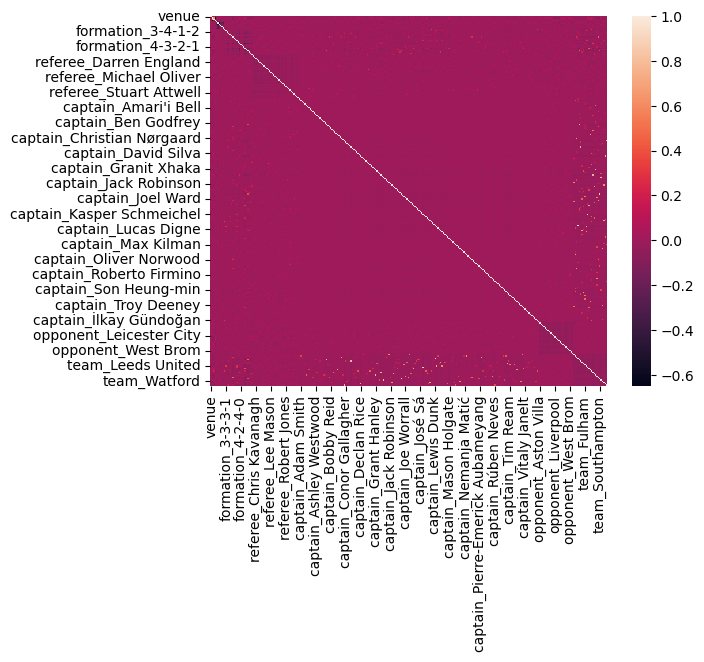

In [26]:
sns.heatmap(df.corr())
plt.show()

## Feature Engineering and Selection

In [27]:
# Splitting features and target variable
X = df.drop(['result', 'gf', 'ga'], axis=1)
y_result = df['result']
y_gf = df['gf']
y_ga = df['ga']

In [28]:
# Splitting the data into training and test sets
X_train_result, X_test_result, y_train_result, y_test_result = train_test_split(X, y_result, test_size=0.2, random_state=42)
X_train_gf, X_test_gf, y_train_gf, y_test_gf = train_test_split(X, y_gf, test_size=0.2, random_state=42)
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X, y_ga, test_size=0.2, random_state=42)

## Random Forest Model Development

In [29]:
# Building and training a Random Forest classifier
rf_model_result = RandomForestClassifier(random_state=42)
rf_model_result.fit(X_train_result, y_train_result)
rf_model_gf = RandomForestClassifier(random_state=42)
rf_model_gf.fit(X_train_gf, y_train_gf)
rf_model_ga = RandomForestClassifier(random_state=42)
rf_model_ga.fit(X_train_ga, y_train_ga)

RandomForestClassifier(random_state=42)

In [30]:
# Making predictions on the test set
y_pred_result = rf_model_result.predict(X_test_result)
y_pred_gf = rf_model_gf.predict(X_test_gf)
y_pred_ga = rf_model_ga.predict(X_test_ga)

## Random Forest Model Evaluation

In [31]:
# Evaluating the model's performance
rf_classification_rep_result = classification_report(y_test_result, y_pred_result)
rf_accuracy_result = accuracy_score(y_test_result, y_pred_result)
print(f"Classification Report of the results predictions:\n{rf_classification_rep_result}")
print(f"Accuracy of the results predictions: {rf_accuracy_result}")
print("\n") # Print new empty line

rf_classification_rep_gf = classification_report(y_test_gf, y_pred_gf)
rf_accuracy_gf = accuracy_score(y_test_gf, y_pred_gf)
print(f"Classification Report of the home team goals predictions:\n{rf_classification_rep_gf}")
print(f"Accuracy of the home team goals predictions: {rf_accuracy_gf}")
print("\n")

rf_classification_rep_ga = classification_report(y_test_ga, y_pred_ga)
rf_accuracy_ga = accuracy_score(y_test_ga, y_pred_ga)
print(f"Classification Report of the away team goals predictions:\n{rf_classification_rep_ga}")
print(f"Accuracy of the away team goals predictions: {rf_accuracy_ga}")

Classification Report of the results predictions:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       354
           1       0.62      0.44      0.52       185
           2       0.73      0.72      0.73       419

    accuracy                           0.68       958
   macro avg       0.67      0.64      0.65       958
weighted avg       0.68      0.68      0.68       958

Accuracy of the results predictions: 0.6816283924843424


Classification Report of the home team goals predictions:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       247
           1       0.47      0.69      0.56       285
           2       0.51      0.39      0.44       220
           3       0.74      0.38      0.50       136
           4       0.66      0.56      0.61        41
           5       0.70      0.41      0.52        17
           6       1.00      0.25      0.40         8
           7       0

C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metr

In [32]:
# Confusion Matrix
rf_conf_matrix_result = confusion_matrix(y_test_result, y_pred_result)
rf_conf_matrix_result

array([[269,  19,  66],
       [ 59,  82,  44],
       [ 85,  32, 302]], dtype=int64)

In [33]:
rf_conf_matrix_gf = confusion_matrix(y_test_gf, y_pred_gf)
rf_conf_matrix_gf

array([[140,  73,  26,   3,   5,   0,   0,   0,   0,   0],
       [ 59, 197,  18,   8,   1,   2,   0,   0,   0,   0],
       [ 34,  91,  85,   6,   3,   1,   0,   0,   0,   0],
       [ 16,  42,  25,  51,   2,   0,   0,   0,   0,   0],
       [  2,  11,   4,   1,  23,   0,   0,   0,   0,   0],
       [  2,   2,   6,   0,   0,   7,   0,   0,   0,   0],
       [  2,   1,   2,   0,   1,   0,   2,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [34]:
rf_conf_matrix_ga = confusion_matrix(y_test_ga, y_pred_ga)
rf_conf_matrix_ga

array([[150, 102,  30,   5,   0,   0,   0,   0],
       [ 57, 216,  29,   8,   1,   0,   0,   0],
       [ 29,  66,  99,   7,   2,   0,   0,   0],
       [ 13,  32,  16,  32,   3,   0,   0,   0],
       [  6,  15,  13,   1,   7,   0,   0,   0],
       [  1,   5,   4,   2,   0,   2,   0,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0],
       [  0,   2,   1,   0,   0,   0,   0,   0]], dtype=int64)

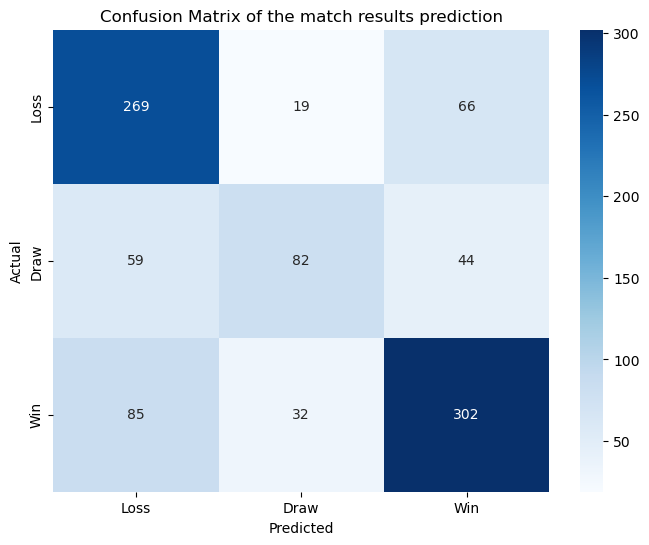

In [35]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(rf_conf_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Draw', 'Win'], yticklabels=['Loss', 'Draw', 'Win'])
plt.title('Confusion Matrix of the match results prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Most Important features used in the Random Forest model development

In [36]:
# Feature importance
rf_importances_result = rf_model_result.feature_importances_
rf_importances_gf = rf_model_gf.feature_importances_
rf_importances_ga = rf_model_ga.feature_importances_

rf_feature_names = X.columns

rf_feature_importance_result_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importances_result}).sort_values(by='Importance', ascending=False)
rf_feature_importance_gf_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importances_gf}).sort_values(by='Importance', ascending=False)
rf_feature_importance_ga_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importances_ga}).sort_values(by='Importance', ascending=False)

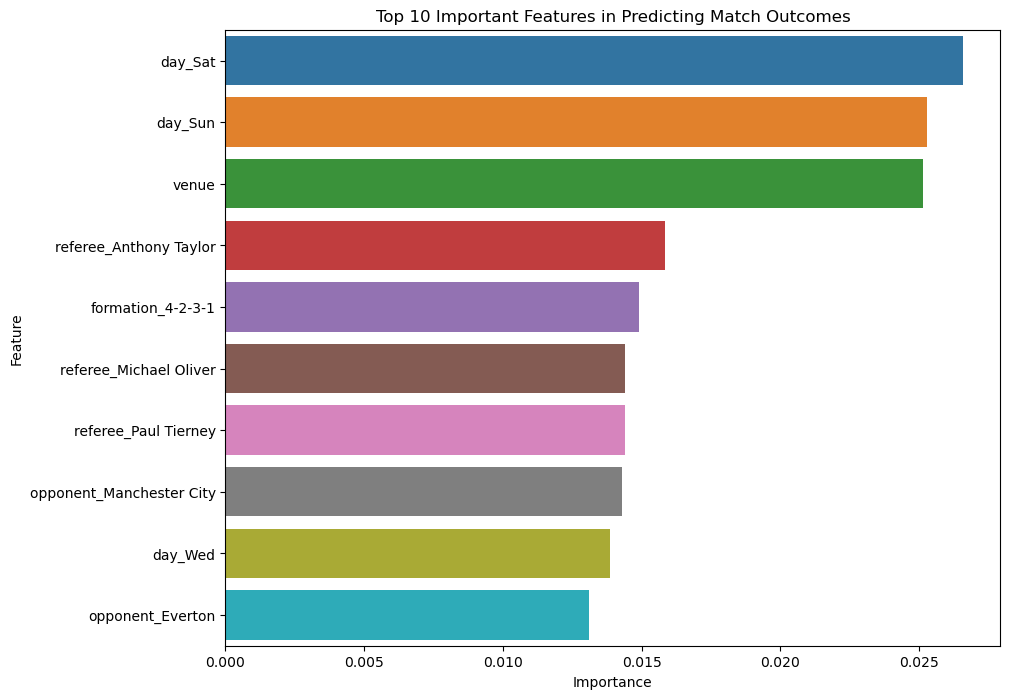

In [37]:
# Visualizing the top 10 important features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_result_df.head(10))
plt.title('Top 10 Important Features in Predicting Match Outcomes')
plt.show()

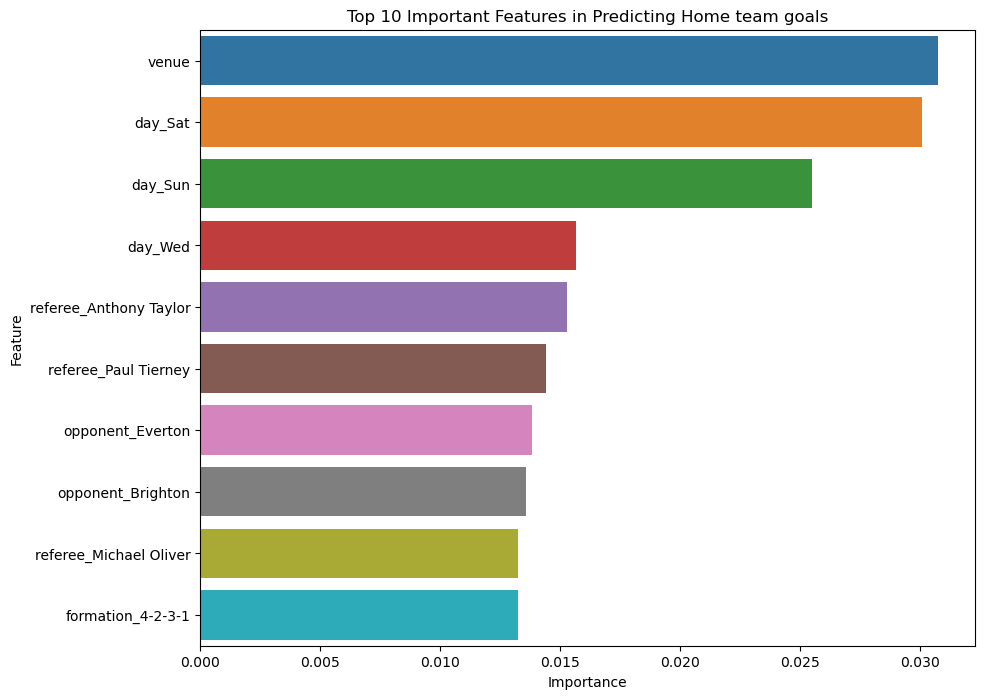

In [38]:
# Visualizing the top 10 important features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_gf_df.head(10))
plt.title('Top 10 Important Features in Predicting Home team goals')
plt.show()

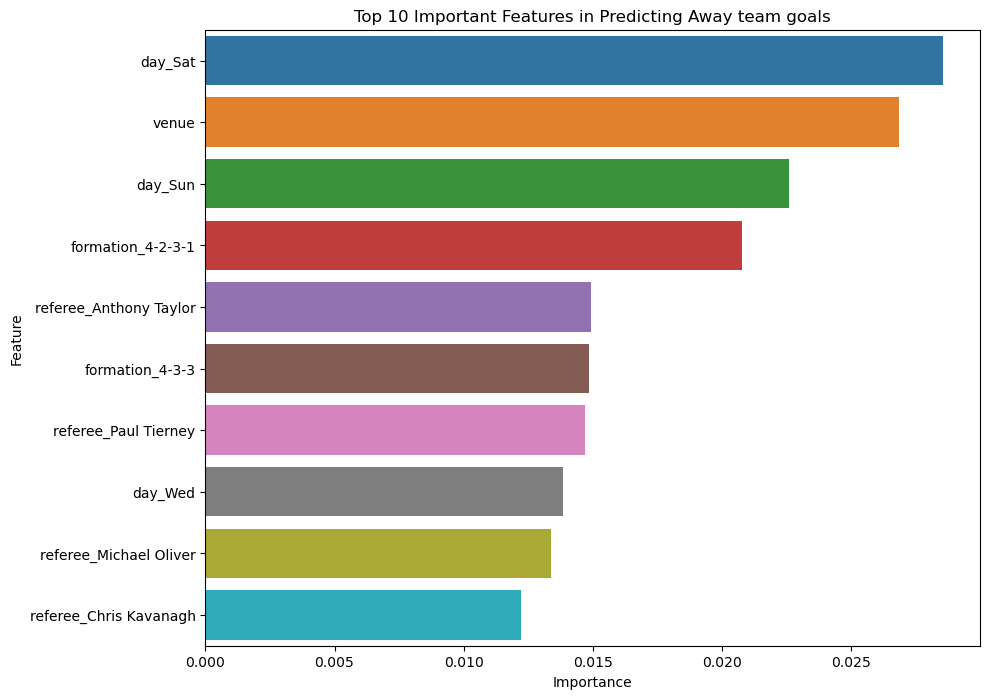

In [39]:
# Visualizing the top 10 important features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_ga_df.head(10))
plt.title('Top 10 Important Features in Predicting Away team goals')
plt.show()

## Extreme Gradient Boosting Model Development

In [40]:
# Building and training a  Extreme Gradient Boosting classifier
xgb_model_result = XGBClassifier(random_state = 42)
xgb_model_result.fit(X_train_result, y_train_result)

xgb_model_gf = XGBClassifier(random_state = 42)
xgb_model_gf.fit(X_train_gf, y_train_gf)

xgb_model_ga = XGBClassifier(random_state = 42)
xgb_model_ga.fit(X_train_ga, y_train_ga)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [41]:
# Making predictions on the test set
y_pred_result = xgb_model_result.predict(X_test_result)
y_pred_gf = xgb_model_gf.predict(X_test_gf)
y_pred_ga = xgb_model_ga.predict(X_test_ga)

## Extreme Gradient Boosting Model Evaluation

In [42]:
# Evaluating the model's performance
xgb_classification_rep_result = classification_report(y_test_result, y_pred_result)
xgb_accuracy_result = accuracy_score(y_test_result, y_pred_result)
print(f"Classification Report of the results prediction:\n{xgb_classification_rep_result}")
print(f"Accuracy of the results prediction: {xgb_accuracy_result}")
print("\n")

xgb_classification_rep_gf = classification_report(y_test_gf, y_pred_gf)
xgb_accuracy_gf = accuracy_score(y_test_gf, y_pred_gf)
print(f"Classification Report of the home team goals predictions:\n{xgb_classification_rep_gf}")
print(f"Accuracy of the home team goals predictions: {xgb_accuracy_gf}")
print("\n")

xgb_classification_rep_ga = classification_report(y_test_ga, y_pred_ga)
xgb_accuracy_ga = accuracy_score(y_test_ga, y_pred_ga)
print(f"Classification Report of the away team goals predictions:\n{xgb_classification_rep_ga}")
print(f"Accuracy of the away team goals predictions: {xgb_accuracy_ga}")

Classification Report of the results prediction:
              precision    recall  f1-score   support

           0       0.58      0.66      0.61       354
           1       0.45      0.23      0.30       185
           2       0.62      0.68      0.65       419

    accuracy                           0.59       958
   macro avg       0.55      0.52      0.52       958
weighted avg       0.57      0.59      0.57       958

Accuracy of the results prediction: 0.5855949895615866


Classification Report of the home team goals predictions:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43       247
           1       0.39      0.58      0.47       285
           2       0.37      0.33      0.35       220
           3       0.39      0.15      0.21       136
           4       0.32      0.20      0.24        41
           5       0.42      0.29      0.34        17
           6       0.67      0.25      0.36         8
           7       0.0

C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murit\anaconda3\Lib\site-packages\sklearn\metr

In [43]:
# Confusion Matrix
xgb_conf_matrix_result = confusion_matrix(y_test_result, y_pred_result)
xgb_conf_matrix_result

array([[232,  23,  99],
       [ 68,  42,  75],
       [103,  29, 287]], dtype=int64)

In [44]:
# Confusion Matrix
xgb_conf_matrix_gf = confusion_matrix(y_test_gf, y_pred_gf)
xgb_conf_matrix_gf

array([[105, 100,  33,   7,   2,   0,   0,   0,   0,   0],
       [ 65, 165,  39,  10,   3,   3,   0,   0,   0,   0],
       [ 46,  88,  73,   5,   7,   1,   0,   0,   0,   0],
       [ 24,  53,  30,  20,   5,   3,   1,   0,   0,   0],
       [  5,  13,  12,   3,   8,   0,   0,   0,   0,   0],
       [  1,   3,   5,   3,   0,   5,   0,   0,   0,   0],
       [  0,   1,   3,   2,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [45]:
# Confusion Matrix
xgb_conf_matrix_ga = confusion_matrix(y_test_ga, y_pred_ga)
xgb_conf_matrix_ga

array([[135, 112,  32,   7,   0,   1,   0,   0],
       [ 80, 169,  40,  20,   2,   0,   0,   0],
       [ 42,  79,  61,  19,   1,   1,   0,   0],
       [ 20,  37,  18,  15,   2,   2,   2,   0],
       [  5,  17,  12,   5,   3,   0,   0,   0],
       [  2,   7,   2,   1,   0,   2,   0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0],
       [  0,   2,   1,   0,   0,   0,   0,   0]], dtype=int64)

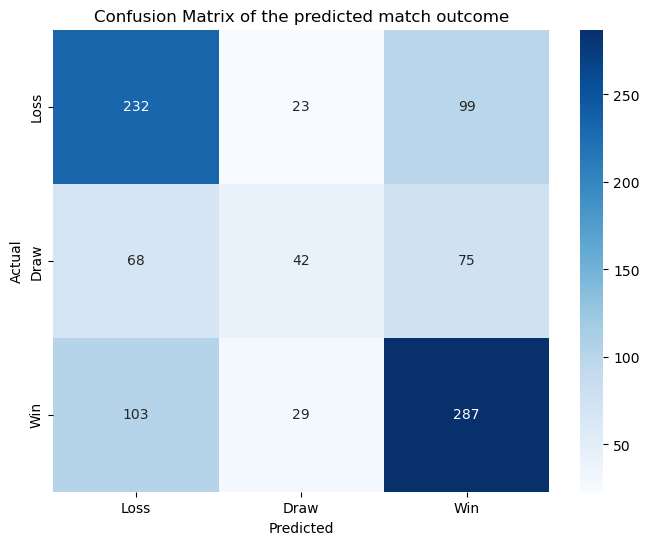

In [46]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(xgb_conf_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Draw', 'Win'], yticklabels=['Loss', 'Draw', 'Win'])
plt.title('Confusion Matrix of the predicted match outcome')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Most Important features used in the Extreme Grradient Boosting model development

In [47]:
# Feature importance
xgb_importances_result = xgb_model_result.feature_importances_
xgb_importances_gf = xgb_model_gf.feature_importances_
xgb_importances_ga = xgb_model_ga.feature_importances_

xgb_feature_names = X.columns

xgb_feature_importance_result_df = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_importances_result}).sort_values(by='Importance', ascending=False)
xgb_feature_importance_gf_df = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_importances_gf}).sort_values(by='Importance', ascending=False)
xgb_feature_importance_ga_df = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_importances_ga}).sort_values(by='Importance', ascending=False)

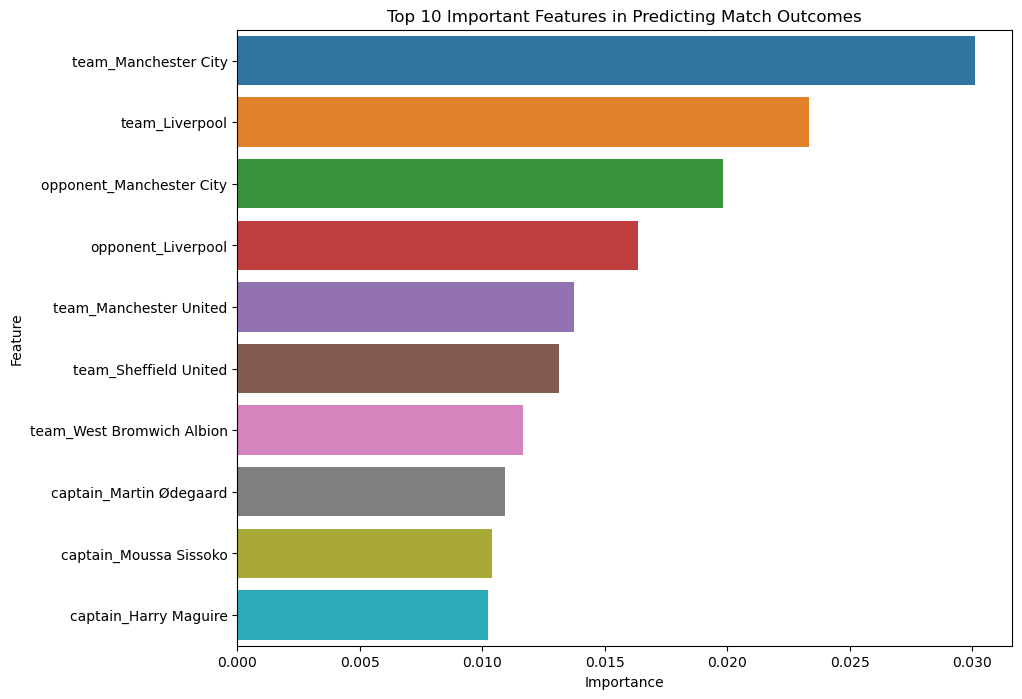

In [48]:
# Visualizing the top 10 important features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_result_df.head(10))
plt.title('Top 10 Important Features in Predicting Match Outcomes')
plt.show()

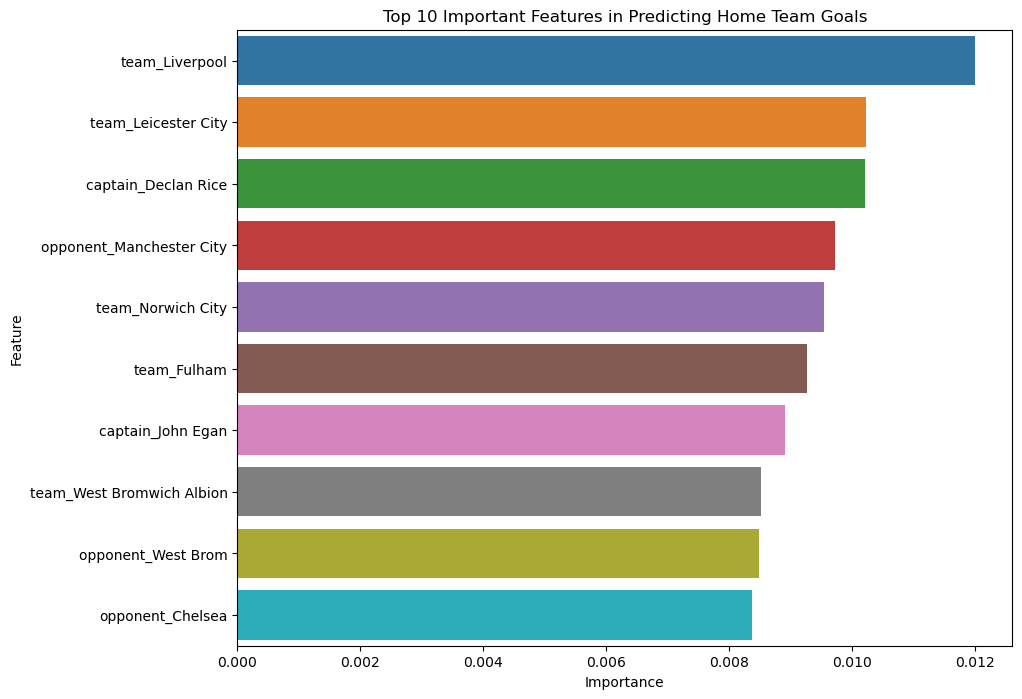

In [49]:
# Visualizing the top 10 important features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_gf_df.head(10))
plt.title('Top 10 Important Features in Predicting Home Team Goals')
plt.show()

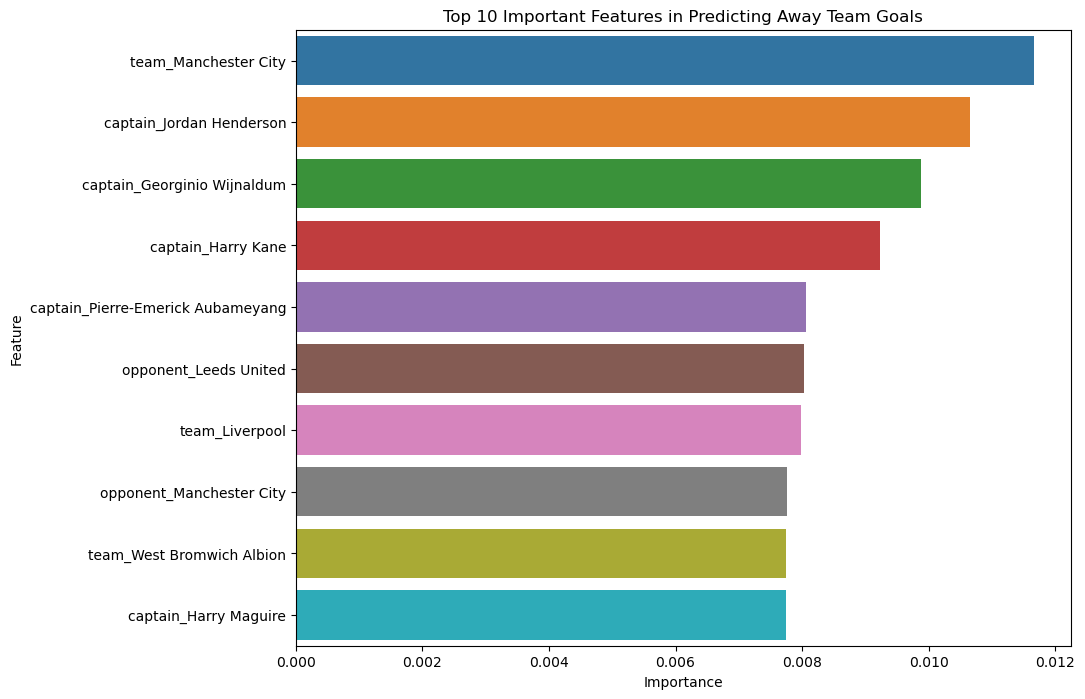

In [50]:
# Visualizing the top 10 important features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_ga_df.head(10))
plt.title('Top 10 Important Features in Predicting Away Team Goals')
plt.show()